In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url=r'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/Mall_Customers.csv'

In [3]:
data=pd.read_csv(url)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data=pd.get_dummies(data,dtype='int',drop_first=True)

In [9]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [11]:
X_train=data[['Annual Income (k$)','Spending Score (1-100)']]
X_train

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=9,random_state=0,n_init='auto')
kmeans.fit(X_train)

KMeans(n_clusters=9, random_state=0)

In [22]:
kmeans.cluster_centers_

array([[ 62.23404255,  47.55319149],
       [ 80.375     ,  82.9375    ],
       [ 79.70833333,  14.29166667],
       [ 28.18181818,  33.27272727],
       [ 25.0952381 ,  80.04761905],
       [114.71428571,  78.42857143],
       [ 46.38888889,  52.13888889],
       [ 24.58333333,   9.58333333],
       [109.7       ,  22.        ]])

In [27]:
kmeans.fit([[25,5]])

ValueError: n_samples=1 should be >= n_clusters=10.

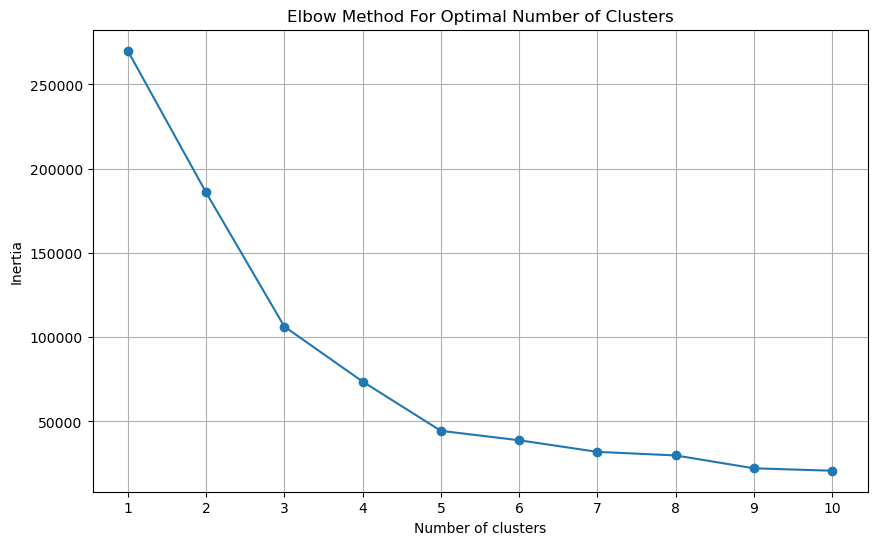

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Selecting the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# List to store the sum of squared distances
inertia = []

# Range of clusters to try
range_clusters = range(1, 11)

# Calculating inertia for each number of clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()
